# British Airways Customer Purchase Prediction

This project was completed as part of the **British Airways Data Science Job Simulation on Forage**.


## Objective
The objective of this analysis is to predict whether a customer will complete a holiday booking using customer booking behaviour and trip characteristics. The model is intended to support proactive customer targeting rather than automated decision-making.


## Importing Libraries and Modules

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score, classification_report

## Dataset Loading
The dataset contains passenger booking and travel-related information provided as part of the British Airways job simulation.


In [26]:
df = pd.read_csv("customer_booking_british_airways.csv", encoding="latin1")
df.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
27785,2,Internet,RoundTrip,20,3,4,Sat,HNDPEN,Japan,1,0,0,7.57,0
17653,1,Internet,RoundTrip,12,45,10,Wed,KTMPEN,Malaysia,1,0,0,4.75,1
37993,2,Internet,RoundTrip,7,5,16,Wed,HANSYD,Vietnam,0,0,0,8.58,1
47336,2,Internet,RoundTrip,16,6,8,Fri,ICNPEN,South Korea,0,0,1,6.62,0
19686,1,Internet,RoundTrip,32,187,11,Tue,MELSGN,Australia,1,1,1,8.83,0
26524,2,Internet,RoundTrip,43,3,14,Wed,BKIHND,Japan,0,0,0,7.57,0
44134,1,Mobile,RoundTrip,1,6,13,Fri,CTUDPS,China,0,1,0,4.72,1
3706,1,Internet,RoundTrip,57,27,3,Fri,CGKCTU,Indonesia,1,0,0,4.72,0
9988,1,Internet,RoundTrip,44,30,5,Sun,DMKPER,Australia,0,0,1,5.62,0
3884,1,Internet,RoundTrip,14,24,10,Sun,CGKICN,Indonesia,1,0,0,6.62,0


In [27]:
df.shape

(50000, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [29]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


### Key Observations
- The dataset contains both numerical and categorical features.
- No major data quality issues were observed.
- The target variable is binary, making this a classification problem.


### Target Variable

The target variable in this project is:

- `booking_complete`
  - 1 → Customer purchased a holiday
  - 0 → Customer did not purchase a holiday

The goal is to predict this outcome based on passenger and booking-related features.


In [30]:
y = df["booking_complete"]
X = df.drop(columns=["booking_complete"])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The dataset is split into training and testing sets to evaluate the model’s ability to generalize to unseen data.


### Applying custom feature engineering

In [32]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, top_n_origins=15):
        self.top_n_origins = top_n_origins
        self.top_origins_ = None

    def fit(self, X, y=None):
        # Identify top booking origins during fit
        self.top_origins_ = (
            X["booking_origin"]
            .value_counts()
            .nlargest(self.top_n_origins)
            .index
        )
        return self

    def transform(self, X):
        X = X.copy()

        # ---------- Add-on features ----------
        X["num_addons"] = (
            X["wants_extra_baggage"]
            + X["wants_preferred_seat"]
            + X["wants_in_flight_meals"]
        )

        # ---------- Purchase lead bucketing ----------
        X["purchase_lead_bucket"] = pd.cut(
            X["purchase_lead"],
            bins=[-1, 7, 30, 90, 365, X["purchase_lead"].max()],
            labels=["Last_Minute", "Short", "Medium", "Long", "Very_Long"]
        )

        # ---------- Length of stay bucketing ----------
        X["stay_type"] = pd.cut(
            X["length_of_stay"],
            bins=[-1, 3, 7, 14, X["length_of_stay"].max()],
            labels=["Short", "One_Week", "Two_Weeks", "Long"]
        )

        # ---------- Flight time of day ----------
        def flight_time_of_day(hour):
            if 5 <= hour <= 8:
                return "Early_Morning"
            elif 9 <= hour <= 11:
                return "Morning"
            elif 12 <= hour <= 16:
                return "Afternoon"
            elif 17 <= hour <= 22:
                return "Evening"
            else:
                return "Night"

        X["flight_time_of_day"] = X["flight_hour"].apply(flight_time_of_day)

        # ---------- Route type ----------
        X["route_type"] = X["flight_duration"].apply(
            lambda x: "Short_Haul" if x < 6 else "Long_Haul"
        )

        # ---------- Booking origin grouping ----------
        X["booking_origin_grouped"] = X["booking_origin"].apply(
            lambda x: x if x in self.top_origins_ else "Other"
        )

        # ---------- Drop raw columns ----------
        X.drop(
            columns=[
                "purchase_lead",
                "length_of_stay",
                "flight_hour",
                "route",
                "wants_extra_baggage",
                "wants_preferred_seat",
                "wants_in_flight_meals",
                "booking_origin"
            ],
            inplace=True
        )

        return X


## Feature Engineering

Raw booking data was transformed to better capture customer intent and trip context. This included bucketing continuous variables such as purchase lead time and length of stay, creating derived features such as number of add-ons selected and route type, and grouping high-cardinality categorical variables like booking origin.

All transformations were implemented using a custom transformer within a pipeline to ensure reproducibility and prevent data leakage.


In [33]:
# Since XGBoost requires numerical input, categorical variables were encoded to ensure compatibility with the model.

categorical_cols = [
    "sales_channel",
    "trip_type",
    "flight_day",
    "purchase_lead_bucket",
    "stay_type",
    "flight_time_of_day",
    "route_type",
    "booking_origin_grouped"
]

numeric_cols = [
    "num_passengers",
    "num_addons",
    "flight_duration"
]

preprocessor = Pipeline(
    steps=[
        ("feature_engineering", FeatureEngineeringTransformer()),
        ("encoding", ColumnTransformer(
            transformers=[
                (
                    "cat",
                    OneHotEncoder(
                        handle_unknown="ignore",
                        sparse_output=False,
                        drop="first"
                    ),
                    categorical_cols
                ),
                (
                    "num",
                    "passthrough",
                    numeric_cols
                )
            ]
        ))
    ]
)


In [34]:
df['booking_complete'].value_counts() # dataset is imbalanced (Class 1 - More Important)

booking_complete
0    42522
1     7478
Name: count, dtype: int64

## Model Selection: XGBoost Classifier

XGBoost was chosen for this task because:
- It performs exceptionally well on structured tabular data
- It captures non-linear relationships
- It is robust to overfitting
- It provides feature importance, enabling business insight extraction


## Class Imbalance

The target variable was moderately imbalanced, with fewer holiday purchases than non-purchases. This was addressed using class weighting in XGBoost via the `scale_pos_weight` parameter to ensure the model appropriately prioritised identifying potential holiday buyers.


In [35]:
neg = (y == 0).sum()
pos = (y == 1).sum()

scale_pos_weight = neg / pos
scale_pos_weight

np.float64(5.6862797539449055)

In [36]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

In [37]:
model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", xgb_model)
    ]
)

## Model Selection

An XGBoost classifier was selected due to its ability to capture non-linear relationships and interactions between customer behaviour variables without requiring feature scaling, making it suitable for modelling complex purchase decisions.


In [38]:
model_pipeline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('feature_engineering', ...), ('encoding', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,top_n_origins,15
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.tran

## Decision Threshold

The model outputs purchase probabilities rather than fixed class labels. A decision threshold of 0.25 was selected to prioritise recall for holiday buyers, ensuring high-intent customers are identified for proactive marketing. This reflects a deliberate trade-off between recall and precision aligned with business objectives.


In [39]:
threshold = 0.25  # chosen based on business needs
y_pred_proba = model_pipeline.predict_proba(x_test)[:, 1]
y_pred_custom = (y_pred_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.97      0.29      0.45      8520
           1       0.19      0.95      0.32      1480

    accuracy                           0.39     10000
   macro avg       0.58      0.62      0.38     10000
weighted avg       0.86      0.39      0.43     10000



A decision threshold of 0.25 was selected to prioritise identifying potential holiday buyers, achieving high recall while accepting lower precision. This operating point is suitable for proactive marketing campaigns where missing high-intent customers is more costly than contacting some non-buyers.

In [40]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC:", roc_auc)

ROC AUC: 0.7672927372795331


## Model Performance

The final model achieved a ROC–AUC of 0.76, indicating good discriminatory power between customers who do and do not complete a holiday booking. This confirms the model’s ability to rank customers by purchase likelihood independently of the chosen decision threshold.


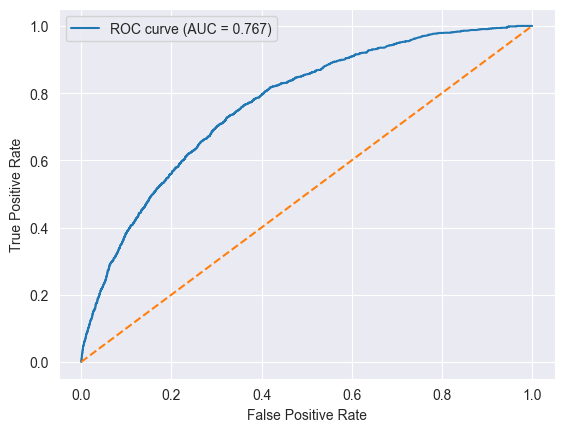

In [41]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


The model demonstrates good predictive performance on the test set, indicating its effectiveness in distinguishing between customers who are likely and unlikely to purchase a holiday.


## Important Features

In [42]:
# Get the trained pipeline components
preprocessor = model_pipeline.named_steps["preprocessor"]
xgb_model = model_pipeline.named_steps["model"]

# Get feature names from ColumnTransformer
feature_names = (
    preprocessor
    .named_steps["encoding"]
    .get_feature_names_out()
)

In [43]:
# Extract importance values
importances = xgb_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by="importance",
    ascending=False
)

In [44]:
# Copy importance dataframe
fi = feature_importance_df.copy()

# Remove transformer prefixes (cat__, num__)
fi["raw_feature"] = (
    fi["feature"]
    .str.replace("cat__", "", regex=False)
    .str.replace("num__", "", regex=False)
)

# Extract base column name (before category)
fi["raw_feature"] = fi["raw_feature"].apply(
    lambda x: x.split("_")[0]
)

# Aggregate importance by raw feature
raw_feature_importance = (
    fi.groupby("raw_feature", as_index=False)["importance"]
    .sum()
    .sort_values("importance", ascending=False)
)

raw_feature_importance


,raw_feature,importance
0,booking,0.735895
1,flight,0.082619
6,stay,0.047464
4,route,0.032447
3,purchase,0.031995
2,num,0.025873
7,trip,0.022621
5,sales,0.021087


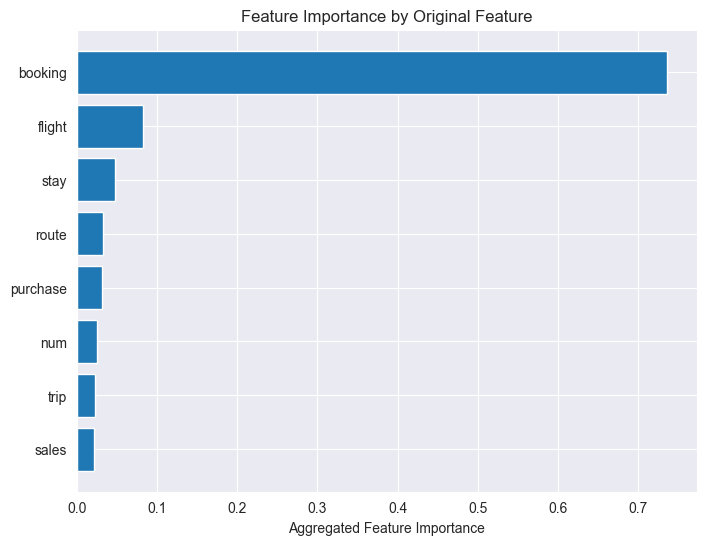

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(
    raw_feature_importance["raw_feature"][::-1],
    raw_feature_importance["importance"][::-1]
)
plt.xlabel("Aggregated Feature Importance")
plt.title("Feature Importance by Original Feature")
plt.show()

## Feature Importance Insights

The feature importance analysis reveals that customer purchase decisions are strongly influenced by booking and travel-related characteristics rather than purely demographic factors.

These insights can help British Airways:
- Improve targeted marketing campaigns
- Personalize holiday offerings
- Identify high-intent customers earlier in the booking journey


## Conclusion

In this project, an XGBoost classifier was successfully trained to predict customer holiday purchases using passenger and booking data. The model not only achieved good predictive performance but also provided valuable insights into the factors influencing customer decisions.

This approach demonstrates how machine learning can support data-driven decision-making in the airline industry.
